**PROBLEM STATEMENT :**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

**IMPORT LIBRARIES AND DATASET** **:** 

In [73]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 **IMPORT SALES TRAINING DATA** **:** 

In [75]:
sales_train_df = pd.read_csv('/content/drive/MyDrive/DiplomaProject/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [76]:
sales_train_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [77]:
sales_train_df.shape

(1017209, 9)

************************************************************************
************************************************************************



We can see that there are a total of 1017209 observations.

There are 9 columns in total and note that sales is the target variable.

--Id: an Id that represents a (Store, Date) duple within the test set 

--Store: a unique Id for each store

--Sales: sales/day, this is the target variable

--Customers: number of customers on a given day

--Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)

--Promo: describes if store is running a promo on that day or not

--StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)

--SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
************************************************************************
************************************************************************



In [78]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [79]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


************************************************************************
************************************************************************

We can infer the following observations from the describe function results :

--Average sales amount per day = 5773 Euros

--minimum sales per day = 0

--maximum sales per day = 41551 

--Average number of customers = 633

--minimum number of customers = 0

--maximum number of customers = 7388
************************************************************************
************************************************************************



**IMPORT STORE DATA** **:** 

In [80]:
store_info_df = pd.read_csv('/content/drive/MyDrive/DiplomaProject/store.csv')

In [81]:
store_info_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


************************************************************************
************************************************************************

--StoreType: categorical variable to indicate type of store (a, b, c, d)

--Assortment: describes an assortment level: a = basic, b = extra, c = extended

--CompetitionDistance (meters): distance to closest competitor store

--CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open

--Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)

--Promo2Since [Year/Week]: date when the store started participating in Promo2

--PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store
************************************************************************
************************************************************************



In [82]:
store_info_df.shape

(1115, 10)

In [83]:
store_info_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


************************************************************************
************************************************************************

This dataframe only includes information about the unique 1115 stores that are part of this study and does not contain information about transaction sales per day.
************************************************************************
************************************************************************



In [84]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


************************************************************************
************************************************************************

on average, the competition distance is 5404 meters away (5.4 kms)
************************************************************************
************************************************************************



**EDA OF DATASETS** **:**

**EDA OF SALES TRAINING DATA** **:** 

In [85]:
#check for any missing data 
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

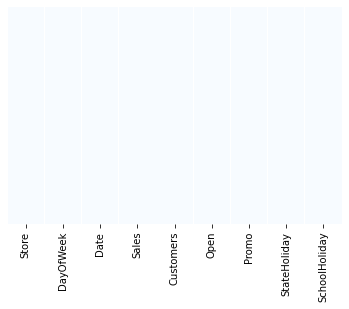

In [86]:
#sns heatmap of missing data 
sns.heatmap(sales_train_df.isnull(), yticklabels = False,cbar = False, cmap = "Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03f7069d10>,
      dtype=object)

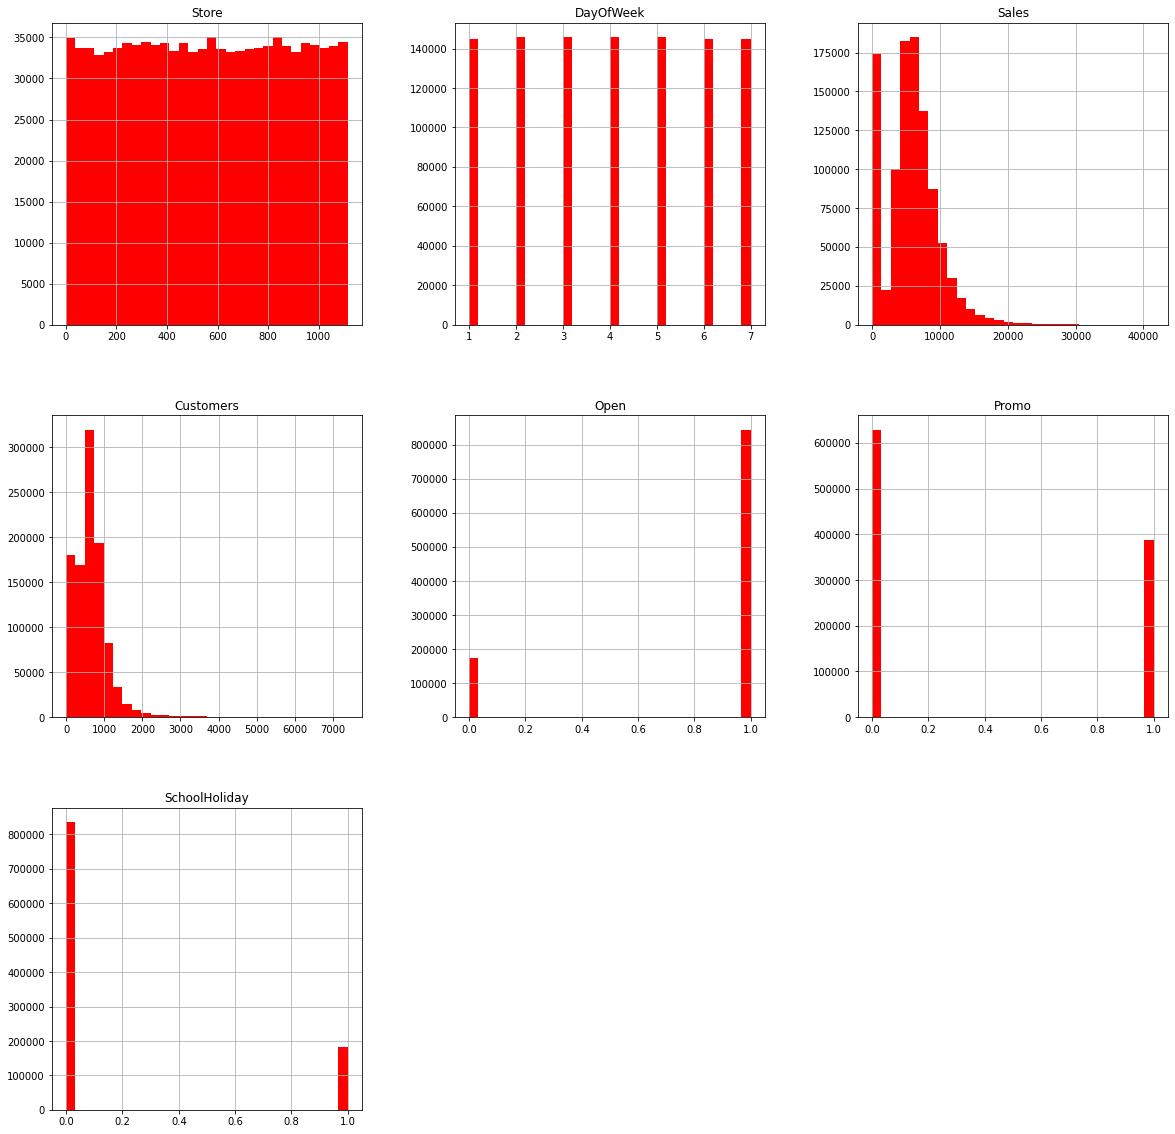

In [87]:
#sales train dataframe histogram
sales_train_df.hist(bins = 30, figsize = (20,20), color = 'r')

************************************************************************
************************************************************************

We can infer the following from the dataframe histogram function :

--Data is equally distributed among all stores

--Data is equally distibuted across various Days of the week

--Stores are open  approximately 80% of the time

--Promo1 was running approximately 40% of the time 

--Average sales is around 5000-6000 Euros

--School holidays are around 18% of the time
************************************************************************
************************************************************************



In [88]:
# how many stores are open and closed with relation to sales
closed_train_zero_sales_df        = sales_train_df[(sales_train_df.Open == 0) & (sales_train_df.Sales == 0)]
closed_train_non_zero_sales_df         = sales_train_df[(sales_train_df.Open == 0) & (sales_train_df.Sales != 0)]
open_train_zero_sales_df        = sales_train_df[(sales_train_df.Open == 1) & (sales_train_df.Sales == 0)]
open_train_non_zero_sales_df        = sales_train_df[(sales_train_df.Open == 1) & (sales_train_df.Sales != 0)]

In [89]:
# Count the number of stores that are open and closed
print("Total =", len(sales_train_df))
print("Number of closed stores with zero sales  =", len(closed_train_df_1))
print("Number of closed stores with non zero sales =", len(closed_train_df_2))
print("Number of open stores with zero sales =", len(open_train_df_1))
print("Number of open stores with non zero sales =", len(open_train_df_2))


Total = 1017209
Number of closed stores with zero sales  = 172817
Number of closed stores with non zero sales = 0
Number of open stores with zero sales = 54
Number of open stores with non zero sales = 844338


************************************************************************
************************************************************************

There are 172817 closed stores in the data which is a significant amount of observations.Also, there are 54 rows with open store but no sales on working days. We will drop these rows as these rows do not have any meaningful contribution and may create bias while forecasting.
************************************************************************
************************************************************************



In [90]:
#  remove closed stores and zero sales rows
sales_train_df = sales_train_df[(sales_train_df['Open'] != 0) & (sales_train_df['Sales'] != 0)]

In [91]:
# drop the open column since it has no meaning now
sales_train_df.drop(['Open'], axis=1, inplace=True)

In [92]:
sales_train_df.shape

(844338, 8)

In [93]:
sales_train_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


**EDA OF STORES INFORMATION DATA** **:** 

In [94]:
#check for any missing data 
store_info_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

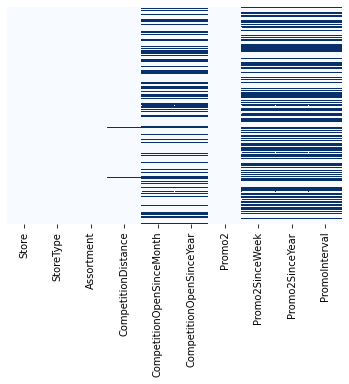

In [95]:
#sns heatmap of missing data
sns.heatmap(store_info_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

************************************************************************
************************************************************************

Let us first start with the missing values in the 'CompetitionDistance' as ony 3 rows are missing
************************************************************************
************************************************************************



In [96]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


************************************************************************
************************************************************************

For this feature, let us fill the missing rows with the average values of the 'CompetitionDistance' column.
************************************************************************
************************************************************************



In [97]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

************************************************************************
************************************************************************

Let us look at the missing values in the 'CompetitionOpenSinceMonth' feature in which 354 rows are missing which constitutes almost one third of the store count.
************************************************************************
************************************************************************



In [98]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


************************************************************************
************************************************************************

Let us check the rows with 'Promo2' equals 0
************************************************************************
************************************************************************



In [99]:
store_info_df[ store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


************************************************************************
************************************************************************

We can infer that, if 'promo2' feature is zero, values in features 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' is also set to zero

And there are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' feature values are missing

We will set these values to zeros 
************************************************************************
************************************************************************



In [100]:
column_features = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for str in column_features:
    store_info_df [str].fillna(0, inplace = True)

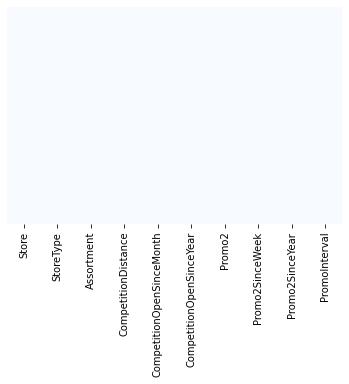

In [101]:
#sns heatmap of missing values shows there are no missing values now
sns.heatmap(store_info_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

**EDA OF MERGED DATASET** **:** 

************************************************************************
************************************************************************

We will merge the sales_train_df and store_info_df data frames together based on 'store' column
************************************************************************
************************************************************************



In [102]:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store') 
#sales_train_all_df.to_csv('test.csv', index=False)

In [103]:
sales_train_all_df.shape

(844338, 17)

In [104]:
sales_train_all_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


************************************************************************
************************************************************************

Let us check the correlations with respect to sales by plotting the seaborn heatmap :
************************************************************************
************************************************************************



In [105]:
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations 

DayOfWeek                   -0.178753
Promo2SinceYear             -0.127581
Promo2                      -0.127556
Promo2SinceWeek             -0.058493
CompetitionDistance         -0.036401
CompetitionOpenSinceMonth   -0.018369
CompetitionOpenSinceYear     0.005257
Store                        0.007723
SchoolHoliday                0.038635
Promo                        0.368199
Customers                    0.823552
Sales                        1.000000
Name: Sales, dtype: float64

************************************************************************
************************************************************************

We can infer that customers and promo are positively correlated with the sales 

Also, Promo2 does not seem to be effective at all
************************************************************************
************************************************************************



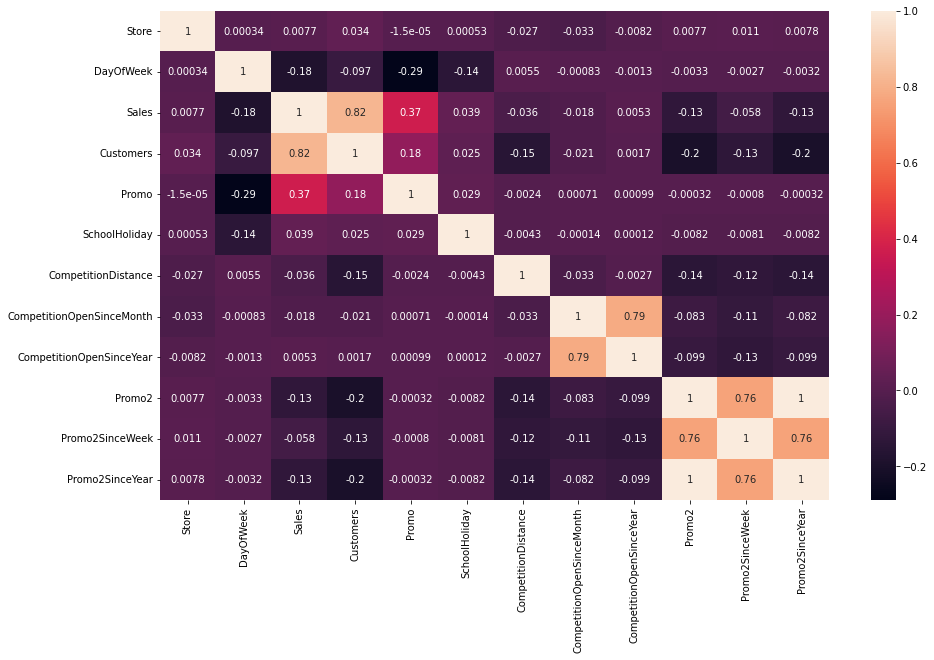

In [106]:
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize = (15, 9))
sns.heatmap(correlations, annot = True)

************************************************************************
************************************************************************

We can conclude that a strong positive correlation exists between the amount of Sales and Customers of a store. 

We can also observe a positive correlation between the stores that had a Promo equal to 1(stores running promotions) and amount of Customers.

Also, for Promo2 equal to 1 ( that is for consecutive promotion ), the number of Customers and Sales has a negative correlation on the heatmap.
************************************************************************
************************************************************************



************************************************************************
************************************************************************

Let us separate the year and put it into a separate column 
************************************************************************
************************************************************************



In [107]:
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [108]:
sales_train_all_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844334,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844335,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013
844336,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013


************************************************************************
************************************************************************

Let us do the same for the Day and Month
************************************************************************
************************************************************************



In [109]:
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [110]:
sales_train_all_df.shape

(844338, 20)

In [111]:
sales_train_all_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


************************************************************************
************************************************************************

Let us take a look at the average sales and number of customers per month 

We can see that  sales and number of customers peak around christmas timeframe
************************************************************************
************************************************************************



Text(0.5, 1.0, 'Average Customers Per Month')

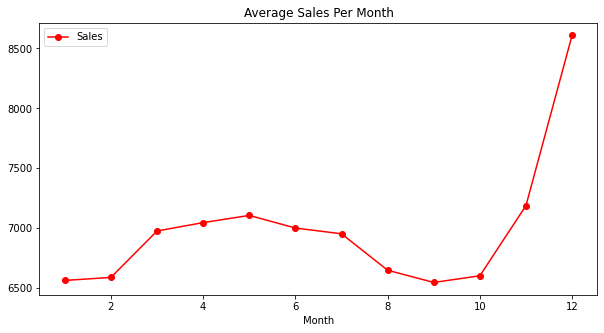

<Figure size 432x288 with 0 Axes>

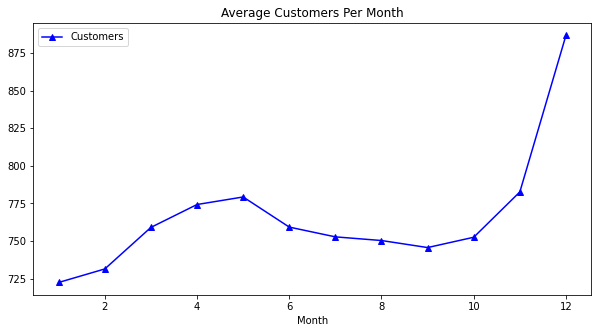

In [112]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')

plt.figure()
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Month')

************************************************************************
************************************************************************

Let us take a look at the sales and customers per day of the month

We can see that Minimum number of customers are generally around the 24th of the month 

Also, most customers and sales are around 30th and 1st of the month
************************************************************************
************************************************************************



Text(0.5, 1.0, 'Average Sales Per Day')

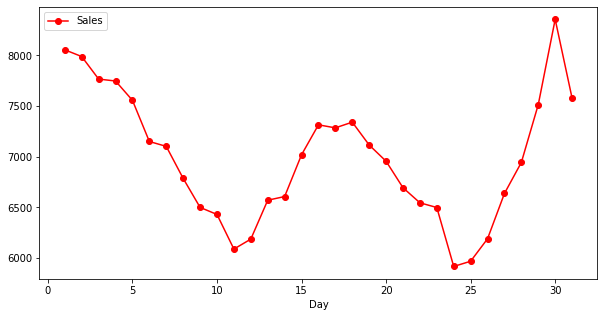

<Figure size 432x288 with 0 Axes>

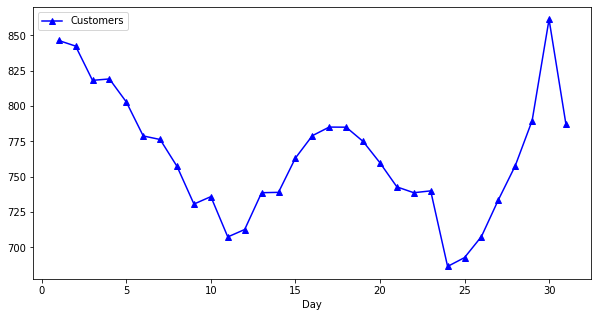

In [113]:
ax = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day')

plt.figure()
ax = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Sales Per Day')

************************************************************************
************************************************************************

Let us take a look at the sales and customers per day of the week

We can see that Minimum number of customers are generally around Saturday 

Also, most customers and sales are on Sunday and Monday
************************************************************************
************************************************************************



Text(0.5, 1.0, 'Average Customers Per Day of the Week')

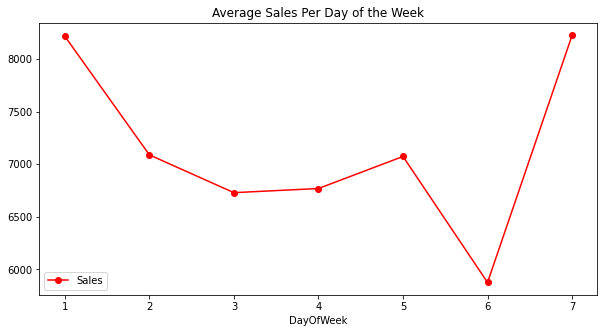

<Figure size 432x288 with 0 Axes>

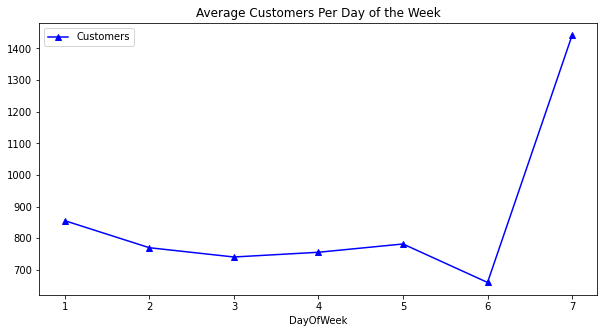

In [114]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day of the Week')

plt.figure()
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Average Customers Per Day of the Week')

**BRIEF SUMMARY OF EDA** **:**

************************************************************************
************************************************************************

1) A strong positive correlation exists between the amount of Sales and Customers of a store.

2) A positive correlation exists between the stores that had a Promo equal to 1(stores running promotions) and amount of Customers.

3) For observations with Promo2 equal to 1 ( that is for consecutive promotion ), the number of Customers and Sales has a negative correlation.

4) Sales and Number of customers peak around christmas timeframe.

5) Minimum number of customers are generally around the 24th of the month.

6) Most customers and Sales are around 30th and 1st of the month.

7) Minimum number of customers are generally on Saturday.

8) Most customers and Sales are on Sunday and Monday.
************************************************************************
************************************************************************

